### tensorflow로 Face Detection 수행하기
* WiderFace 데이터세트로 Pretrained된 Tensorflow graph 모델을 다운로드 받아 이를 이용해 Face Detection 수행. 

#### Tensorflow Face Detector
* Github : https://github.com/yeephycho/tensorflow-face-detection
* SSD + MobileNet기반으로 Pretrained된 모델 다운로드 
* https://github.com/yeephycho/tensorflow-face-detection/raw/master/model/frozen_inference_graph_face.pb

#### SSD + Mobilenet Pretrained된 모델 로딩하여 Face  Detection

Instructions for updating:
Use tf.gfile.GFile.
face: 0.9964
face: 0.9951
face: 0.9914
face: 0.9911
face: 0.9904
face: 0.9882
face: 0.9877
face: 0.9761
face: 0.9755
face: 0.9740
face: 0.9667
face: 0.9640
face: 0.9592
face: 0.9587
face: 0.9544
face: 0.9442
face: 0.9213
face: 0.9006
face: 0.8964
face: 0.8853
face: 0.8644
face: 0.8461
face: 0.8405
face: 0.8310
face: 0.8242
face: 0.8194
face: 0.7923
face: 0.7840
face: 0.7827
face: 0.7746
face: 0.7604
face: 0.7434
face: 0.7191
face: 0.7108
face: 0.6926
face: 0.6902
face: 0.6755
face: 0.6551
face: 0.6531
face: 0.6243
face: 0.6139
face: 0.6107
face: 0.5777
face: 0.5726
face: 0.5613
face: 0.5372
face: 0.4968
face: 0.4912
face: 0.4825
face: 0.4727
face: 0.4677
face: 0.4638
face: 0.4384
face: 0.4296
face: 0.4189
face: 0.4108
face: 0.4002
Detection 수행시간: 0.91 초


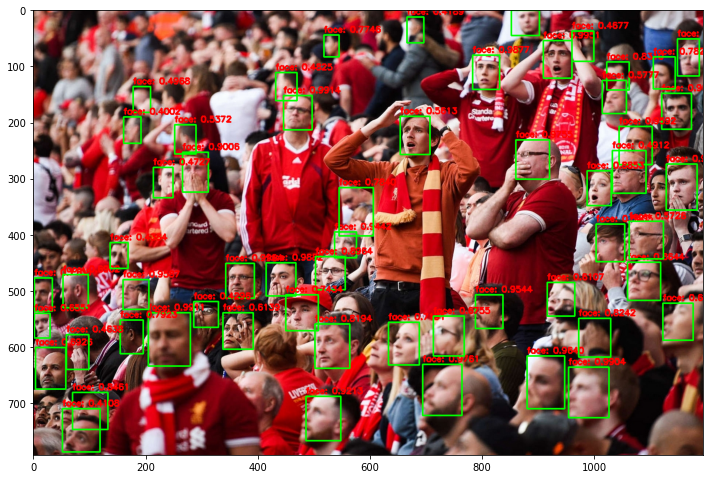

In [2]:
import numpy as np
import tensorflow as tf
import cv2
import time
import matplotlib.pyplot as plt
%matplotlib inline


#inference graph를 읽음. .
with tf.gfile.FastGFile('./pretrained/frozen_inference_graph_face.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    
with tf.Session() as sess:
    # Session 시작하고 inference graph 모델 로딩 
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    
    # 입력 이미지 생성 및 BGR을 RGB로 변경 
    img = cv2.imread('../../data/image/EPL01.jpg')
    draw_img = img.copy()
    rows = img.shape[0]
    cols = img.shape[1]
    inp = cv2.resize(img, (300, 300))
    # OpenCV로 입력받은 BGR 이미지를 RGB 이미지로 변환 
    inp = inp[:, :, [2, 1, 0]] 

    start = time.time()
    # Object Detection 수행. 
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    
    # Bounding Box 시각화 
    # Detect된 Object 별로 bounding box 시각화 
    num_detections = int(out[0][0])
    for i in range(num_detections):
        # class id와 object class score, bounding box정보를 추출
        classId = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.4:
            left = bbox[1] * cols
            top = bbox[0] * rows
            right = bbox[3] * cols
            bottom = bbox[2] * rows
            # cv2의 rectangle(), putText()로 bounding box의 클래스명 시각화 
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), green_color, thickness=2)
            caption = "face: {:.4f}".format(score)
            print(caption)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 2)
    
    print('Detection 수행시간:',round(time.time() - start, 2),"초")
    
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
        

Detection 수행시간: 0.993 초


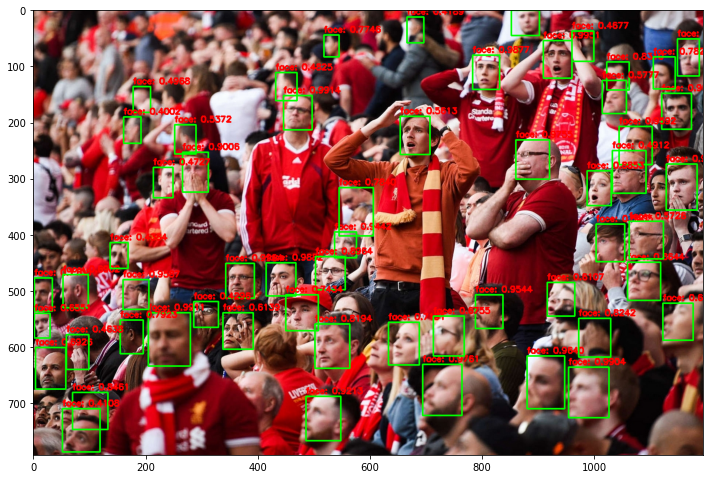

In [3]:
def get_tensor_detected_image(sess, img_array, use_copied_array):
    
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array
    
    inp = cv2.resize(img_array, (300, 300))
    inp = inp[:, :, [2, 1, 0]]  # BGR2RGB
    
    start = time.time()
    # Object Detection 수행. 
    out = sess.run([sess.graph.get_tensor_by_name('num_detections:0'),
                    sess.graph.get_tensor_by_name('detection_scores:0'),
                    sess.graph.get_tensor_by_name('detection_boxes:0'),
                    sess.graph.get_tensor_by_name('detection_classes:0')],
                   feed_dict={'image_tensor:0': inp.reshape(1, inp.shape[0], inp.shape[1], 3)})
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    
    # Bounding Box 시각화 
    # Detect된 Object 별로 bounding box 시각화 
    num_detections = int(out[0][0])
    for i in range(num_detections):
        # class id와 object class score, bounding box정보를 추출
        classId = int(out[3][0][i])
        score = float(out[1][0][i])
        bbox = [float(v) for v in out[2][0][i]]
        if score > 0.4:
            left = bbox[1] * cols
            top = bbox[0] * rows
            right = bbox[3] * cols
            bottom = bbox[2] * rows
            # cv2의 rectangle(), putText()로 bounding box의 클래스명 시각화 
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), green_color, thickness=2)
            caption = "face: {:.4f}".format(score)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 2)
    
    print('Detection 수행시간:',round(time.time() - start, 3),"초")
    return draw_img

#inference graph를 읽음. .
with tf.gfile.FastGFile('./pretrained/frozen_inference_graph_face.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    
with tf.Session() as sess:
    # Session 시작하고 inference graph 모델 로딩 
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    
    # 입력 이미지 생성, Object Detection된 image 반환, 반환된 image의 BGR을 RGB로 변경 
    img = cv2.imread('../../data/image/EPL01.jpg')
    draw_img = get_tensor_detected_image(sess, img, True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

#### tensorflow로 SSD+ Inception 기반 video Object Detection 수행

In [4]:
from IPython.display import clear_output, Image, display, Video, HTML
Video('../../data/video/InfiniteWar01.mp4')

In [5]:
video_input_path = '../../data/video/InfiniteWar01.mp4'
# linux에서 video output의 확장자는 반드시 avi 로 설정 필요. 
video_output_path = '../../data/output/InfiniteWar01_ssd.avi'

cap = cv2.VideoCapture(video_input_path)

codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_fps = cap.get(cv2.CAP_PROP_FPS)
    
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) 

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt, 'FPS:', vid_fps )

green_color=(0, 255, 0)
red_color=(0, 0, 255)

# SSD+Inception inference graph를 읽음. .
with tf.gfile.FastGFile('./pretrained/frozen_inference_graph_face.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    
with tf.Session() as sess:
    # Session 시작하고 inference graph 모델 로딩 
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    index = 0
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break

        draw_img_frame = get_tensor_detected_image(sess, img_frame, False)
        vid_writer.write(draw_img_frame)
    # end of while loop

vid_writer.release()
cap.release()  


총 Frame 갯수: 455 FPS: 28.086477544192476
Detection 수행시간: 1.124 초
Detection 수행시간: 0.059 초
Detection 수행시간: 0.055 초
Detection 수행시간: 0.049 초
Detection 수행시간: 0.054 초
Detection 수행시간: 0.054 초
Detection 수행시간: 0.054 초
Detection 수행시간: 0.052 초
Detection 수행시간: 0.052 초
Detection 수행시간: 0.063 초
Detection 수행시간: 0.057 초
Detection 수행시간: 0.052 초
Detection 수행시간: 0.057 초
Detection 수행시간: 0.054 초
Detection 수행시간: 0.051 초
Detection 수행시간: 0.053 초
Detection 수행시간: 0.054 초
Detection 수행시간: 0.054 초
Detection 수행시간: 0.054 초
Detection 수행시간: 0.055 초
Detection 수행시간: 0.054 초
Detection 수행시간: 0.052 초
Detection 수행시간: 0.054 초
Detection 수행시간: 0.056 초
Detection 수행시간: 0.054 초
Detection 수행시간: 0.051 초
Detection 수행시간: 0.062 초
Detection 수행시간: 0.06 초
Detection 수행시간: 0.055 초
Detection 수행시간: 0.052 초
Detection 수행시간: 0.054 초
Detection 수행시간: 0.054 초
Detection 수행시간: 0.053 초
Detection 수행시간: 0.052 초
Detection 수행시간: 0.051 초
Detection 수행시간: 0.053 초
Detection 수행시간: 0.055 초
Detection 수행시간: 0.052 초
Detection 수행시간: 0.053 초
Detection 수행시간: 0.063 초
D

In [ ]:
!gsutil cp ../../data/output/InfiniteWar01_ssd.avi gs://my_bucket_dlcv/data/output/InfiniteWar01_ssd.avi